#What is needed, what do we want to simulate 
#Try to make a small-scale energy mangement system 
#Build something how much money you could save 
#Taking the perspective of someone trying to install a solar system 
#IF you have a solar system what do you gain by isntalling 
#ASsume you have 3 types of use of electricity - lighting and typical use, more intensive consumption
#such as air conditioing, third would be lectric vehicle 

#Would start by finding three types of utilties to model those types of consumption 

#One utility function expressed there 

#Could yo do something like scaling based on their amount consumed 
#Consider how you have to model something from the renewbales
#Different kinds of renewbales models evlauted with or without solar 
#Comapre baseline to with renewable 

#Utility function generated from data 

#solar panel traces for a spefic day 
#picantstreet solar with smart meter consumption 
#Do smaller scale data 
#Use actual soalr consumption data, have an estimated utility function 
#Then answer roguhly the same type of question, with or without soalr what do you get 

#Many choices of retail pricing 
#Everybody has their own different values 
#Could see fixed charges based on solar capacity 

#Use their pricing equations for retail pricing 
#Becomes a parameter of the problem rather than something that changes constantly 
#Use stepping equation 
#Utility has to go to regulator every year to ask them to reset the price, the regulator is doing something different from Ramsey pricing. 
#They guarantee their costs are recovered then choose a different parameter 
# Forgot about changing prices
#PRice becomes a parameter 

#Do a project that is manaeble, build it around problem 1 but use real data of rooftop solar generation 
#Estimate utility parameter
#Evaluate what owould be the surplus and what would be the payment with and without rooftop 

#Talks about how much rooftop solar generates 

90IdyNRwQOO0iv3PXV6wPAbfHl8dKrBFXWDWBadf

In [7]:
import numpy as np
from geopy.geocoders import Nominatim

# initialize Nominatim API 
geolocator = Nominatim(user_agent="geoapiExercises")

place = "NY Larchmont 10538"
location = geolocator.geocode(place)
print(location.latitude) 
coords = [str(location.latitude), str(location.longitude)]

api_pull = 'https://developer.nrel.gov/api/solar/solar_resource/v1.json?lat=' + coords[0]+ '&lon='+ coords[1] + '&api_key=90IdyNRwQOO0iv3PXV6wPAbfHl8dKrBFXWDWBadf' 

print(api_pull)

40.93565510435881
https://developer.nrel.gov/api/solar/solar_resource/v1.json?lat=40.93565510435881&lon=-73.75707389271197&api_key=90IdyNRwQOO0iv3PXV6wPAbfHl8dKrBFXWDWBadf


In [8]:
import requests 
import json
import pandas as pd

#Selecting Type of Module Used in Array
mod_options = ['Standard', 'Premium', 'Thin film'] 

module = 'Standard'

mod_df =pd.DataFrame({'Standard': [0], 'Premium': [1], 'Thin film': [2]})

module_type = mod_df[module][0]
sys_cap = 15
#Tilt of the Soalr Cells relatie to horizontal
tilt = coords[0]

#Selecting The Proper Array Arrangement
arr_options = ['Fixed - Open Rack', 'Fixed - Roof Mounted', '1-Axis', '1-Axis Backtracking', '2-Axis']
arr_df = pd.DataFrame({'Fixed - Open Rack':[0], 'Fixed - Roof Mounted':[1], '1-Axis':[2] \
,'1-Axis Backtracking':[3], '2-Axis':[4]})

array = 'Fixed - Roof Mounted'

array_type = arr_df[array][0]


#Azimuth angle
azi_options = ['S','SSW', 'SW','WSW','W','WNW', 'NW','NNW', 'N' ,'NNE','NE', 'ENE', 'E', 'ESE', 'SE','SSE']
azi_df = pd.DataFrame({'S':[0], 'SSW':[22.5], 'SW':[45],'WSW':[67.5],'W':[90],'WNW':[112.5], 'NW':[135],'NNW':[157.5],\
     'N':[180],'NNE':[202.5],'NE':[225], 'ENE':[247.5], 'E':[270], 'ESE':[297.5], 'SE':[315],'SSE':[337.5]}) 
azi = 'S'
azimuth = azi_df[azi][0]

# Now Add the losses your system will experience 
losses = 15


# Now Use the Latitude and Longitude Given to doan API pull of the soalr data from NREL 
api_pull = 'https://developer.nrel.gov/api/pvwatts/v6.json?lat=' + coords[0]+ '&lon='+ coords[1]\
 + '&module_type=' + str(module_type)+ '&system_capacity=' + str(sys_cap) + '&tilt=' + str(tilt) + '&array_type='\
    + str(array_type) + '&azimuth=' + str(azimuth) +'&losses=' + str(losses)\
         +'&api_key=90IdyNRwQOO0iv3PXV6wPAbfHl8dKrBFXWDWBadf'

print(api_pull)

https://developer.nrel.gov/api/pvwatts/v6.json?lat=40.93565510435881&lon=-73.75707389271197&module_type=0&system_capacity=15&tilt=40.93565510435881&array_type=1&azimuth=0&losses=15&api_key=90IdyNRwQOO0iv3PXV6wPAbfHl8dKrBFXWDWBadf


In [9]:
response_API = requests.get(api_pull) 

data =response_API.text
dict = json.loads(data) 
d2 = dict['outputs'] 

#Need to figure out how to access ghi data specifically by month 
df = pd.DataFrame.from_dict(d2)
print(df.ac_monthly)  

0      234.132751
1      293.464539
2      522.079834
3      989.313354
4     1419.654785
5     1529.273193
6     1541.031616
7     1112.291138
8      597.998779
9      335.686462
10     232.596756
11     216.794159
Name: ac_monthly, dtype: float64


In [10]:
print(round(float(coords[0]))) 
d3 = df.monthly 

print(d3.avg_ghi)

mod_df =pd.DataFrame({'Standard': [0], 'Premium': [1], 'Thin film': [2]})
print(mod_df['Premium'][0])

41


AttributeError: 'DataFrame' object has no attribute 'monthly'

[ 206.14285714 2426.14285714  -38.32142857]


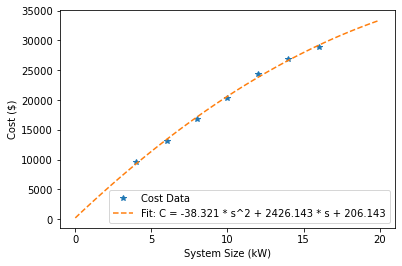

In [11]:
import numpy as np 
from numpy.polynomial import polynomial as p 
import matplotlib.pyplot as plt
size = [4 , 6 , 8, 10, 12, 14, 16 ]
cost = [9620, 13098, 16872, 20350, 24420, 26936, 28860]
degree = 2
c, stats = p.polyfit(size, cost, degree, full=True)
size_fit = np.linspace(0, 20, 101)
cost_fit = p.polyval(size_fit,c)
plt.plot(size, cost, '*', label ='Cost Data') 


plt.plot(size_fit, cost_fit, '--', label = 'Fit: C = %5.3f * s^2 + %5.3f * s + %5.3f' %tuple([c[2], c[1], c[0]]))
plt.xlabel('System Size (kW)')
plt.ylabel('Cost ($)')
plt.legend()
plt.rcParams['font.size'] = 13
print(c)

In [12]:
obj = TimezoneFinder()
tz = obj.timezone_at(lng = lon, lat = lat) 
site_location = location.Location(lat, lon, tz=tz)

dates= ['01-01-2019', '01-01-2021']
days = [31, 28, 31, 30, 31, 30, 31,31, 30, 31, 30, 31] 

dy_irad = np.zeros([8760,2])
for i in range(0,len(dates)):
     dy_irad[:,i] = get_irradiance(site_location, dates[i], tilt, azimuth)
     
     
for h in range(0,len(days)): 
     avg_irad = (dy_irad[:,0] + dy_irad[:,1])/2 


NameError: name 'TimezoneFinder' is not defined

In [5]:
# Now Use the Latitude and Longitude Given to doan API pull of the utility rates from NREL 
price_pull = 'https://developer.nrel.gov/api/utility_rates/v3.json?lat=' + coords[0]+ '&lon='+ coords[1] +'&api_key=90IdyNRwQOO0iv3PXV6wPAbfHl8dKrBFXWDWBadf'

response_API = requests.get(price_pull) 
# utility pricing data is in $/kWh 
Pdata =response_API.text
Pdict = json.loads(Pdata) 
Pd2 = Pdict['outputs'] 
price_df = pd.DataFrame.from_dict(Pd2)
print(price_df) 

print(7500 *.2)

  company_id                            utility_name  \
0       4226  Consolidated Edison Co of New York Inc   

                                        utility_info  commercial  industrial  \
0  {'company_id': '4226', 'utility_name': 'Consol...      0.1155       0.106   

   residential  
0       0.2321  
1500.0


In [6]:
summ = [0.030123129,0.028412052,0.027893306,0.0282233,0.029348275,0.028643837, \
    0.034073772,0.038129946,0.040214751,0.040616718,0.043581589,0.046959892,0.046221516,0.047289287, \
        0.049114413,0.051597397,0.05465336,0.054475666,0.051541176,0.054747908,0.053664921,0.04792486,0.039092799,0.033456129] 
fall = [0.027909024,	0.028068565,	0.028688672,	0.034958594,	0.036082744,	0.036810749,	0.048275996,	0.045167662,	0.042198906,\
     	0.042714116,	0.042488399,	0.044230298,	0.042157561,	0.04218743,	0.040286818,	0.041876612,	0.046910151,	0.057671775,	0.055978038,\
               	0.056256477,	0.051948516,	0.043169701,	0.03390215,	0.030061045]
print(fall)

[0.027909024, 0.028068565, 0.028688672, 0.034958594, 0.036082744, 0.036810749, 0.048275996, 0.045167662, 0.042198906, 0.042714116, 0.042488399, 0.044230298, 0.042157561, 0.04218743, 0.040286818, 0.041876612, 0.046910151, 0.057671775, 0.055978038, 0.056256477, 0.051948516, 0.043169701, 0.03390215, 0.030061045]


In [25]:
from collections import namedtuple
import altair as alt
#from tkinter import Image
import math
import streamlit as st
import numpy as np
import time 
import pandas as pd
from geopy.geocoders import Nominatim 
import requests 
import json
from pvlib import location as loc
from pvlib import irradiance
import pandas as pd
from matplotlib import pyplot as plt
from plot_ghi_transposition import get_irradiance
from timezonefinder import TimezoneFinder 

lon = -76.498 
lat = 42.4218
obj = TimezoneFinder()
tz = obj.timezone_at(lng = lon, lat = lat) 
site_location = loc.Location(lat, lon, tz=tz)
tilt = 30 
azimuth = 180
dates= ['07-01-2019', '07-01-2021','10-01-2019', '10-01-2021']
days = 31

dy_irad = np.zeros([4,744,2])
for i in range(0,len(dates)):
     dy_irad[i,:,:] = get_irradiance(site_location, dates[i], tilt, azimuth)



summ_irad = (dy_irad[0,:,:] + dy_irad[1,:,:])/2 
fall_irad = (dy_irad[2,:,:] + dy_irad[3,:,:])/2 


summ_hrs = np.zeros([24])
fall_hrs = np.zeros([24])
for j in range(0, 31):
     summ_hrs[:] = summ_hrs[:]+ summ_irad[j*24:(j*24+24),1]/31
     fall_hrs[:] = fall_hrs[:] + fall_irad[j*24:(j*24+24),1]/31 

print(fall_hrs)

[  0.           0.           0.           0.           0.
   0.           0.           0.          76.53043282 328.64558798
 559.17065464 733.45192353 838.4614136  866.94896261 816.95495811
 691.84990223 500.25588866 257.47109758  30.56916619   0.
   0.           0.           0.           0.        ]


In [44]:
summ_pwr = summ_hrs *.2
fall_pwr = fall_hrs * .2
res_price = 0.05
pm = res_price - 0.03 
pp = res_price

q_s = np.zeros([24])
q_f = np.zeros([24])
for h in range(0,23): 
     a_s = summ[h] + res_price
     a_f = fall[h] + res_price 
     qp_s = np.max([summ_pwr[h] +.01, a_s])
     qm_s = summ_pwr[h] - .05 
     qp_f = np.max([fall_pwr[h] +.01, a_f])
     qm_f = fall_pwr[h] - .05
     #calculations for summer  
     if summ_pwr[h]   != 0:
          while a_s*(qp_s+.05) - .5 * (qp_s+.05)**2 -pp*(qp_s+.05 - summ_pwr[h]) > a_s*(qp_s) - .5 * (qp_s)**2 -pp*(qp_s - summ_pwr[h]):
               qp_s = qp_s +.05
          while a_s*(qm_s-.05) - .5 * (qm_s-.05)**2 -pm*(qm_s+.05 - summ_pwr[h]) > a_s*(qm_s) - .5 * (qm_s)**2 -pm*(qm_s - summ_pwr[h]):
               qm_s = qm_s -.05
     else:
          while a_s*(qp_s+.05) - .5 * (qp_s+.05)**2 -pp*(qp_s+.05 - summ_pwr[h]) > a_s*(qp_s) - .5 * (qp_s)**2 -pp*(qp_s - summ_pwr[h]):
               qp_s = qp_s +.05
     Sps = a_s*(qp_s) - .5 * (qp_s)**2 -pp*(qp_s - summ_pwr[h])
     Sms = a_s*(qm_s) - .5 * (qm_s)**2 -pm*(qm_s - summ_pwr[h])
     Ses = a_s * summ_pwr[h] - .5*(summ_pwr[h]**2) 
     Ss = np.max([Sps,Sms,Ses])
     if Ss == Sps : 
          q_s[h] = qp_s 
     elif Ss == Sms: 
          q_s[h] = qm_s 
     else: 
          q_s[h] = summ_pwr[h] 

     #Calculations for fall
     if fall_pwr[h]   != 0:
          while a_s*(qp_f+.05) - .5 * (qp_f+.05)**2 -pp*(qp_f+.05 - fall_pwr[h]) > a_s*(qp_f) - .5 * (qp_f)**2 -pp*(qp_f - fall_pwr[h]):
               qp_f = qp_f +.05
          while a_s*(qm_f-.05) - .5 * (qm_f-.05)**2 -pm*(qm_f+.05 - fall_pwr[h]) > a_s*(qm_f) - .5 * (qm_f)**2 -pm*(qm_f - fall_pwr[h]):
               qm_f = qm_f -.05
     else:
          while a_s*(qp_f+.05) - .5 * (qp_f+.05)**2 -pp*(qp_f+.05 - fall_pwr[h]) > a_s*(qp_f) - .5 * (qp_f)**2 -pp*(qp_f - fall_pwr[h]):
               qp_f = qp_f +.05 
     
     Spf = a_f*(qp_f) - .5 * (qp_f)**2 -pp*(qp_f - fall_pwr[h])
     Smf = a_f*(qm_f) - .5 * (qm_f)**2 -pm*(qm_f - fall_pwr[h])
     Sef = a_f * fall_pwr[h] - .5*(fall_pwr[h]**2) 
     Sf = np.max([Spf,Smf,Sef])
     if Sf == Spf : 
          q_f[h] = qp_f 
     elif Sf == Smf: 
          q_f[h] = qm_f 
     else: 
          q_f[h] = fall_pwr[h] 

In [45]:


Sps = a_s*(qp_s) - .5 * (qp_s)**2 -pp*(qp_s - summ_pwr[h])
Sms = a_s*(qm_s) - .5 * (qm_s)**2 -pm*(qm_s - summ_pwr[h])
Ses = a_s * summ_pwr[h] - .5*(summ_pwr[h]**2) 
print(Sms)
Ss = np.max([Sps,Sms,Ses]) 

print(q_s)

-0.004704639950000001
[0.         0.         0.         0.         0.         0.
 0.09109671 0.12974208 0.09471087 0.10984335 0.09122204 0.12216142
 0.11043189 0.123471   0.10594446 0.10592543 0.13390155 0.13455726
 0.11291912 0.14558808 0.13432631 0.         0.         0.        ]
